# Previsão com redes Neuronais LSTM


In [2]:
import matplotlib
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
from scipy.signal import find_peaks
import sys
from pandas import datetime
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler


/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
Using TensorFlow backend.


In [3]:
PATH_DATA_es = '/home/joao/Desktop/AA2-Grupo13/Data/serie_historica_acumulados.csv'
PATH_DATA_it = '/home/joao/Desktop/AA2-Grupo13/Data/dpc-covid19-ita-regioni2.csv'

In [4]:
d_name_es = {
'AN':'Andalucía',
'AR':'Aragón',
'AS':'Asturias',
'IB':'Baleares',
'CN':'Canarias',
'CB':'Cantabria',
'CM':'Castilla La Mancha',
'CL':'Castilla y León',
'CT':'Cataluña',
'CE':'Ceuta',
'VC':'C. Valenciana',
'EX':'Extremadura',
'GA':'Galicia',
'MD':'Madrid',
'ML':'Melilla',
'MC':'Murcia',
'NC':'Navarra',
'PV':'País Vasco',
'RI':'La Rioja'
}

d_ccaa_es = {
'Andalucía': 'Andalucía',
'Aragón': 'Aragón',
'Asturias': 'Principado de Asturias',
'Baleares': 'Islas Baleares',
'Canarias': 'Islas Canarias',
'Cantabria':'Cantabria',
'Castilla La Mancha': 'Castilla-La Mancha',
'Castilla y León': 'Castilla y León',
'Cataluña': 'Cataluña',
'Ceuta': 'Ceuta y Melilla',
'C. Valenciana': 'Comunidad Valenciana',
'Extremadura': 'Extremadura',
'Galicia': 'Galicia',
'Madrid': 'Comunidad de Madrid',
'Melilla': 'Ceuta y Melilla',
'Murcia': 'Región de Murcia',
'Navarra': 'Comunidad Foral de Navarra',
'País Vasco': 'País Vasco',
'La Rioja': 'La Rioja'
}

d_ccaa_id_es = {
'Andalucía': "1",
'Aragón' : "2",
'Principado de Asturias': "3",
'Islas Baleares': "4",
'Islas Canarias': "5",
'Cantabria': "6",
'Castilla-La Mancha': "7",
'Castilla y León': "8",
'Cataluña': "9",
'Ceuta y Melilla': "10",
'Comunidad Valenciana': "11",
'Extremadura': "12",
'Galicia': "13",
'Comunidad de Madrid' : "14",
'Ceuta y Melilla': "15",
'Región de Murcia': "16",
'Comunidad Foral de Navarra': "17",
'País Vasco': "18",
'La Rioja': "19"
}

d_ccaa_population_es = {
'Andalucía': 8414240,
'Aragón' : 1319291,
'Principado de Asturias': 1022800,
'Islas Baleares': 1149460,
'Islas Canarias': 2153389,
'Cantabria': 581078,
'Castilla-La Mancha': 2032863,
'Castilla y León': 2399548,
'Cataluña': 7675217,
'Ceuta y Melilla': 171264,
'Comunidad Valenciana': 5003769,
'Extremadura': 1067710,
'Galicia': 2699499,
'Comunidad de Madrid' : 6663394,
'Ceuta y Melilla': 171264,
'Región de Murcia': 1493898,
'Comunidad Foral de Navarra': 654214,
'País Vasco': 2207776,
'La Rioja': 316798
}

d_name_it = {
'Abruzzo': 'Abruzzo',
'Basilicata': 'Basilicata',
'Calabria': 'Calabria',
'Campania': 'Campania',
'Emilia-Romagna': 'Emilia-Romagna',
'Friuli Venezia Giulia': 'Friuli Venezia Giulia',
'Lazio': 'Lazio',
'Liguria': 'Liguria',
'Lombardia': 'Lombardia',
'Marche': 'Marche',
'Molise': 'Molise',
'Piemonte': 'Piemonte',
'Puglia': 'Puglia',
'Sardegna': 'Sardegna',
'Sicilia': 'Sicilia',
'Toscana': 'Toscana',
'P.A. Bolzano': 'P.A. Bolzano',
'P.A. Trento': 'P.A. Trento',
'Umbria': 'Umbria' ,
'Valle d\'Aosta': 'Valle d\'Aosta',
'Veneto': 'Veneto'
}

regione_id_it = {
'Abruzzo': 1,
'Basilicata' : 2,
'Calabria': 3,
'Campania': 4,
'Emilia-Romagna': 5,
'Friuli Venezia Giulia': 6,
'Lazio': 7,
'Liguria': 8,
'Lombardia': 9,
'Marche': 10,
'Molise': 11,
'Piemonte': 12,
'Puglia': 13,
'Sardegna' : 14,
'Sicilia': 15,
'Toscana': 16,
'P.A. Bolzano': 17,
'P.A. Trento': 18,
'Umbria' : 19,
'Valle d\'Aosta': 20,
'Veneto': 21
}

regione_pop_it = {
'Abruzzo': 1311580,
'Basilicata' : 562869,
'Calabria': 1947131,
'Campania': 5801692,
'Emilia-Romagna': 4459477,
'Friuli Venezia Giulia': 1215220,
'Lazio': 5879082,
'Liguria': 1550640,
'Lombardia': 10060574,
'Marche': 1525271,
'Molise': 305617,
'Piemonte': 4356406,
'Puglia': 4029053,
'Sardegna' : 1639591,
'Sicilia': 4999891,
'Toscana': 3729641,
'P.A. Bolzano': 520891,
'P.A. Trento': 117417,
'Umbria' : 882015,
'Valle d\'Aosta': 125666,
'Veneto': 4905854
}

In [5]:
df_es = pd.read_csv(PATH_DATA_es, encoding='latin-1')
df_es.fillna(0, inplace = True)
df_es["CCAA"] = df_es["CCAA"].map(d_name_es)
df_es["CCAA_for_Folium"] = df_es["CCAA"].map(d_ccaa_es)
df_es["id"] = df_es["CCAA_for_Folium"].map(d_ccaa_id_es)

df_es["Population"] = df_es["CCAA_for_Folium"].map(d_ccaa_population_es)


df_es.rename(columns = {"FECHA":"DATE",
                    "CASOS":"TOTAL_INFECTED",
                    "Hospitalizados":"REQUIERED_HOSPITALIZATION",
                    "UCI":"REQUIERED_ADVANCED_CARE",
                    "Fallecidos":"TOTAL_DEATHS",
                    "Recuperados":"CURED"}, inplace = True)

df_es["CCAA"].isnull().sum()
df_es.dropna(inplace = True, axis = "rows") # apagar o texto no fim do ficheiro
df_es["CCAA"].isnull().sum()

def correct_date_es(date_str):
    list_dates = date_str.split("/")
    day = list_dates[0]
    month = list_dates[1]
    year = list_dates[2]
    
    if len(day) == 1:
        day = "0" + day
    if len(month) == 1:
        month = "0" + month
        
    return "/".join([day, month, year])

df_es["NEW_DATE"] = df_es["DATE"].apply(correct_date_es)
df_es["DATE"] = pd.to_datetime(df_es["NEW_DATE"], format='%d/%m/%Y')
df_es = df_es[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_es["id"].astype(np.int16)
df_es.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Andalucía,2020-02-20,0.0,0.0,0.0,0.0,0.0,8414240.0
1,2,Aragón,2020-02-20,0.0,0.0,0.0,0.0,0.0,1319291.0
2,3,Asturias,2020-02-20,0.0,0.0,0.0,0.0,0.0,1022800.0
3,4,Baleares,2020-02-20,1.0,0.0,0.0,0.0,0.0,1149460.0
4,5,Canarias,2020-02-20,1.0,0.0,0.0,0.0,0.0,2153389.0


In [6]:
df_it = pd.read_csv(PATH_DATA_it, encoding='latin-1')
df_it.fillna(0, inplace = True)
df_it["CCAA"] = df_it["denominazione_regione"].map(d_name_it)
df_it["CCAA_for_Folium"] = df_it["denominazione_regione"].map(d_name_it)
df_it["id"] = df_it["CCAA_for_Folium"].map(regione_id_it)

df_it["Population"] = df_it["CCAA_for_Folium"].map(regione_pop_it)

df_it.rename(columns = {"data":"DATE",
                    "totale_casi":"TOTAL_INFECTED",
                    "totale_ospedalizzati":"REQUIERED_HOSPITALIZATION",
                    "terapia_intensiva":"REQUIERED_ADVANCED_CARE",
                    "deceduti":"TOTAL_DEATHS",
                    "dimessi_guariti":"CURED"}, inplace = True)
df_it["CCAA"].isnull().sum()

def correct_date_it(date_str):
    list_dates = date_str.split("-")
    day = list_dates[2]
    month = list_dates[1]
    year = list_dates[0]
        
    return "/".join([day, month, year])



df_it["NEW_DATE"] = df_it["DATE"].apply(correct_date_it)
df_it["DATE"] = pd.to_datetime(df_it["NEW_DATE"], format='%d/%m/%Y')
df_it = df_it[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_it["id"].astype(np.int16)
df_it.head(500)



,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Abruzzo,2020-02-24,0,0,0,0,0,1311580
1,2,Basilicata,2020-02-24,0,0,0,0,0,562869
2,17,P.A. Bolzano,2020-02-24,0,0,0,0,0,520891
3,3,Calabria,2020-02-24,0,0,0,0,0,1947131
4,4,Campania,2020-02-24,0,0,0,0,0,5801692
...,...,...,...,...,...,...,...,...,...
495,12,Piemonte,2020-03-18,2341,2007,227,154,0,4356406
496,13,Puglia,2020-03-18,383,186,30,19,2,4029053
497,14,Sardegna,2020-03-18,134,49,7,2,0,1639591
498,15,Sicilia,2020-03-18,282,129,29,3,12,4999891


## A previção tem 5 fases:

- Definir o problema de aprendizagem supervisionada.
- Conjunto de dados para teste.
- Algoritmo de persistência.
- Fazer e avaliar previsão.
- Fazer os gráficos

### Regiões de Espanha

63 47 16
Train Score: 111.69 RMSE
Test Score: 336.09 RMSE


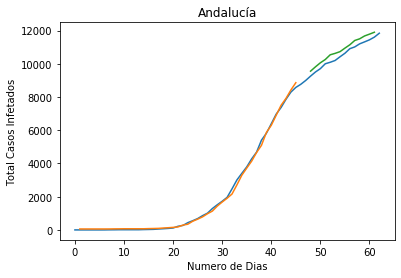

63 47 16
Train Score: 52.19 RMSE
Test Score: 154.24 RMSE


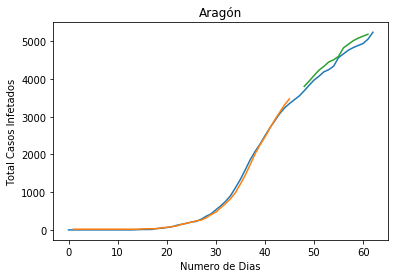

63 47 16


KeyboardInterrupt: 

In [11]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_es["DATE"].unique()))]
ccaas = list(df_es["CCAA"].unique())


i=0 

while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_es[df_es["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values})
    
    values = np.reshape(fds["Infetados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    
    train_size = int(len(dataset) * 0.75)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(dataset),len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(25, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados')
    plt.show()   
            

In [ ]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_es["DATE"].unique()))]
ccaas = list(df_es["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_es[df_es["CCAA"] == ccaa]["DATE"].values ,'Curados': df_es[df_es["CCAA"] == ccaa]["CURED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Curados': df_es[df_es["CCAA"] == ccaa]["CURED"].values})
    
    values = np.reshape(fds["Curados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    train_size = int(len(dataset) * 0.75)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados')
    plt.show()   

### Regiões de Itália

In [ ]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_it["DATE"].unique()))]
ccaas = list(df_it["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_it[df_it["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values})
    
    values = np.reshape(fds["Infetados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    train_size = int(len(dataset) *0.75)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados')
    plt.show()

In [ ]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_it["DATE"].unique()))]
ccaas = list(df_it["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_it[df_it["CCAA"] == ccaa]["DATE"].values ,'Curados': df_it[df_it["CCAA"] == ccaa]["CURED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Curados': df_it[df_it["CCAA"] == ccaa]["CURED"].values})
    
    values = np.reshape(fds["Curados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    train_size = int(len(dataset) * 0.75)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Curados')
    plt.show()

61 21
Epoch 1/100
 - 1s - loss: 0.0089
Epoch 2/100
 - 0s - loss: 0.0070
Epoch 3/100
 - 0s - loss: 0.0067
Epoch 4/100
 - 0s - loss: 0.0065


In [ ]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_es["DATE"].unique()))]
ccaas = list(df_es["CCAA"].unique())


i=0 
# create and fit the LSTM network
model = Sequential()
model.add(GRU(25, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_es[df_es["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values})
    
    values = np.reshape(fds["Infetados"].values,(-1,1))
    dataset = values.astype('float32')
    # fix random seed for reproducibility
    np.random.seed(7)

    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    # split into train and test sets
    
    train_size = int(len(dataset) * 0.75)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    print(len(dataset),len(train), len(test))
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-look_back-1):
            a = dataset[i:(i+look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    i += 1
    
    # reshape into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    

    trainX[0] =0
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot,label= "real")
    plt.plot(testPredictPlot,label= "predict")
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados')
    plt.show()   
            